# GRIP Task 4- Exploratory Data Analysis - Terrorism

## Kajal Gaikwad

### Data Science & Business Analytics intern at The Sparks Foundation.

### Aim: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

### Question: 1) As a security/defense analyst, try to find out the hot zone of terrorism.   2) What all security issues and insights you can derive by EDA?

### Dataset: https://bit.ly/2TK5Xn5

In [158]:
# import necessary libraries

import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [3]:
data.shape

(181691, 135)

In [4]:
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [159]:
# Rename some columns of dataset

data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country_name','region_txt':'Region_name','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','targsubtype1_txt':'Target_sub_type','gname':'Group_name','weaptype1_txt':'Weapon_type','nkill':'Kill','nwound':'Wound'},inplace=True)

In [160]:
# Check for null values in 'Wound' column

data['Wound'].isnull().sum()

0

In [161]:
# check for null values in 'Kill' column 

data['Kill'].isnull().sum()

0

Fill null values of 'Kill' and 'Wound' with 0

In [8]:
data['Wound']=data['Wound'].fillna(0)
data['Kill']=data['Kill'].fillna(0)

creating new column with column 'Kill; and "wound'

In [9]:
data['Casualties']=data['Kill']+data['Wound']

In [10]:
data.describe()

eventid           Year          Month            Day  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...   ransomamtus    ransompaid  \
count  1.771340e+05  181685.000000  ...  5.630000e+02  7.740000e+02   
mean  -4.586957e+02       1.451452  ...  5.784865e+05  7.179437e+05   
std    2.047790e+05       0.995430  ...  7.077924e+06  1.014392e+07   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00 -9.900000e+01   
50%    4.324651e+01       1.000000  ...  0.000000e+00  0.000000e+00   
75%    6.871033e+01       1.000000  ...  0.000000e+00  1.273412e+03   
max    1.793667e+02       5.000000  ...  1.320000e+08  2.750000e+08   

       ransompaidus  hostkidoutcome     nreleased        INT_LOG  \
count    552.000000    10991.000000  10400.000000  181691.000000   
mean     240.378623        4.629242    -29.018269      -4.543731   
std     2940.967293        2.035360     65.720119       4.543547   
min      -99.000000        1.000000    -99.000000      -9.000000   
25%        0.000000        2.000000    -99.000000      -9.000000   
50%        0.000000        4.000000      0.000000      -9.000000   
75%        0.000000        7.000000      1.000000       0.000000   
max    48000.000000        7.000000   2769.000000       1.000000   

            INT_IDEO       INT_MISC        INT_ANY     Casualties  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.464398       0.090010      -3.945952       5.150156  
std         4.637152       0.568457       4.691325      40.555416  
min        -9.000000      -9.000000      -9.000000       0.000000  
25%        -9.000000       0.000000      -9.000000       0.000000  
50%        -9.000000       0.000000       0.000000       1.000000  
75%         0.000000       0.000000       0.000000       4.000000  
max         1.000000       1.000000       1.000000    9574.000000  

[8 rows x 78 columns]

In [11]:
data['Year']

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: Year, Length: 181691, dtype: int64

### Plotting the number of attacks in each year

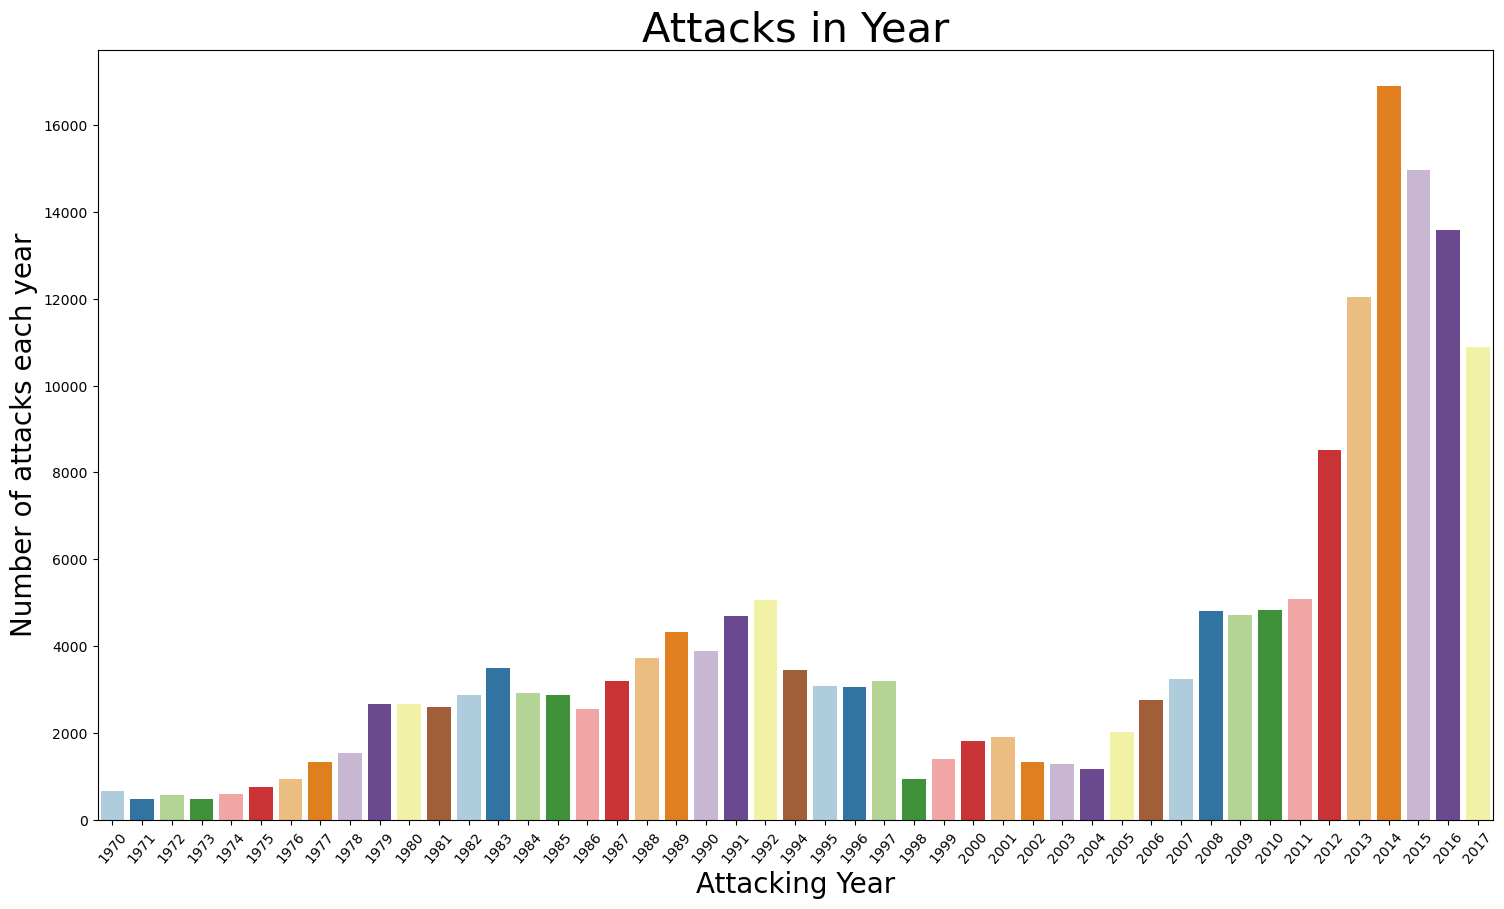

In [12]:
year=data['Year'].unique()                                   
year_count=data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))                                                # customize the figure size
sns.barplot(x=year, y=year_count, palette='Paired')
plt.xticks(rotation=50)                                               # names on x axis titles by 50%
plt.xlabel('Attacking Year', fontsize=20)
plt.ylabel('Number of attacks each year', fontsize=20)
plt.title('Attacks in Year', fontsize=30)
plt.show()

plotting the number of attacks to find the terrorist activities by region

In [13]:
data['Region_name'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

### Terorist activity regionwise

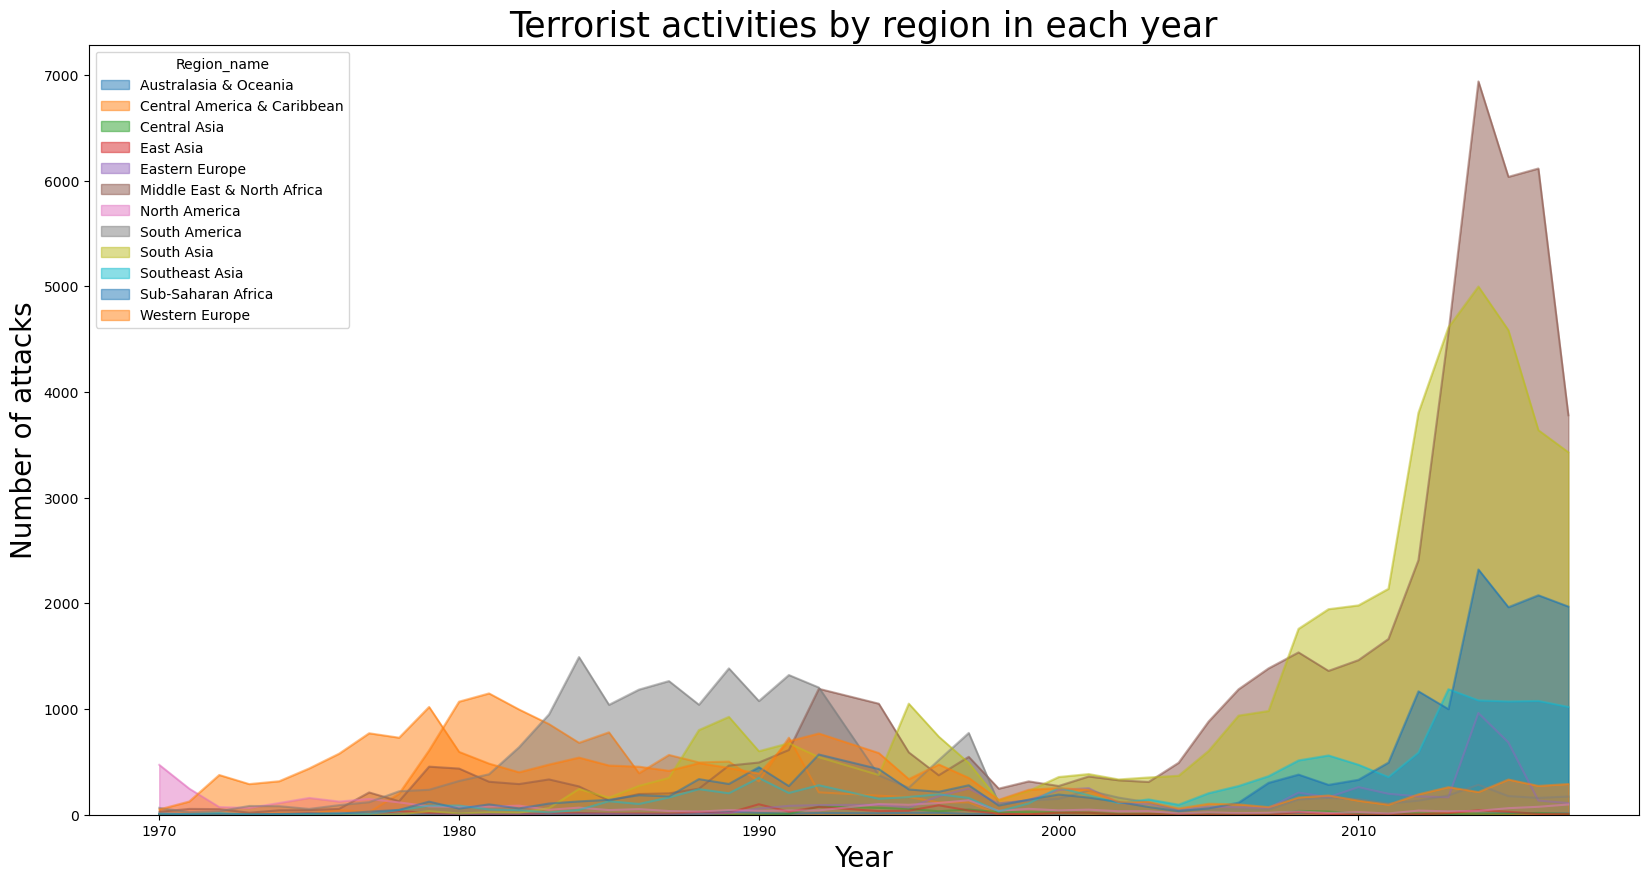

In [14]:
pd.crosstab(data.Year, data.Region_name).plot(kind='area', stacked=False, figsize=(20,10))
plt.title('Terrorist activities by region in each year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of attacks', fontsize=20)
plt.show()

In [16]:
data['Group_name'].value_counts().head(10)     

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group_name, dtype: int64

### Top 10 Country with Number of attacks

In [24]:
attack=data['Country_name'].value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country_name, dtype: int64

### Plotting the top countries affected

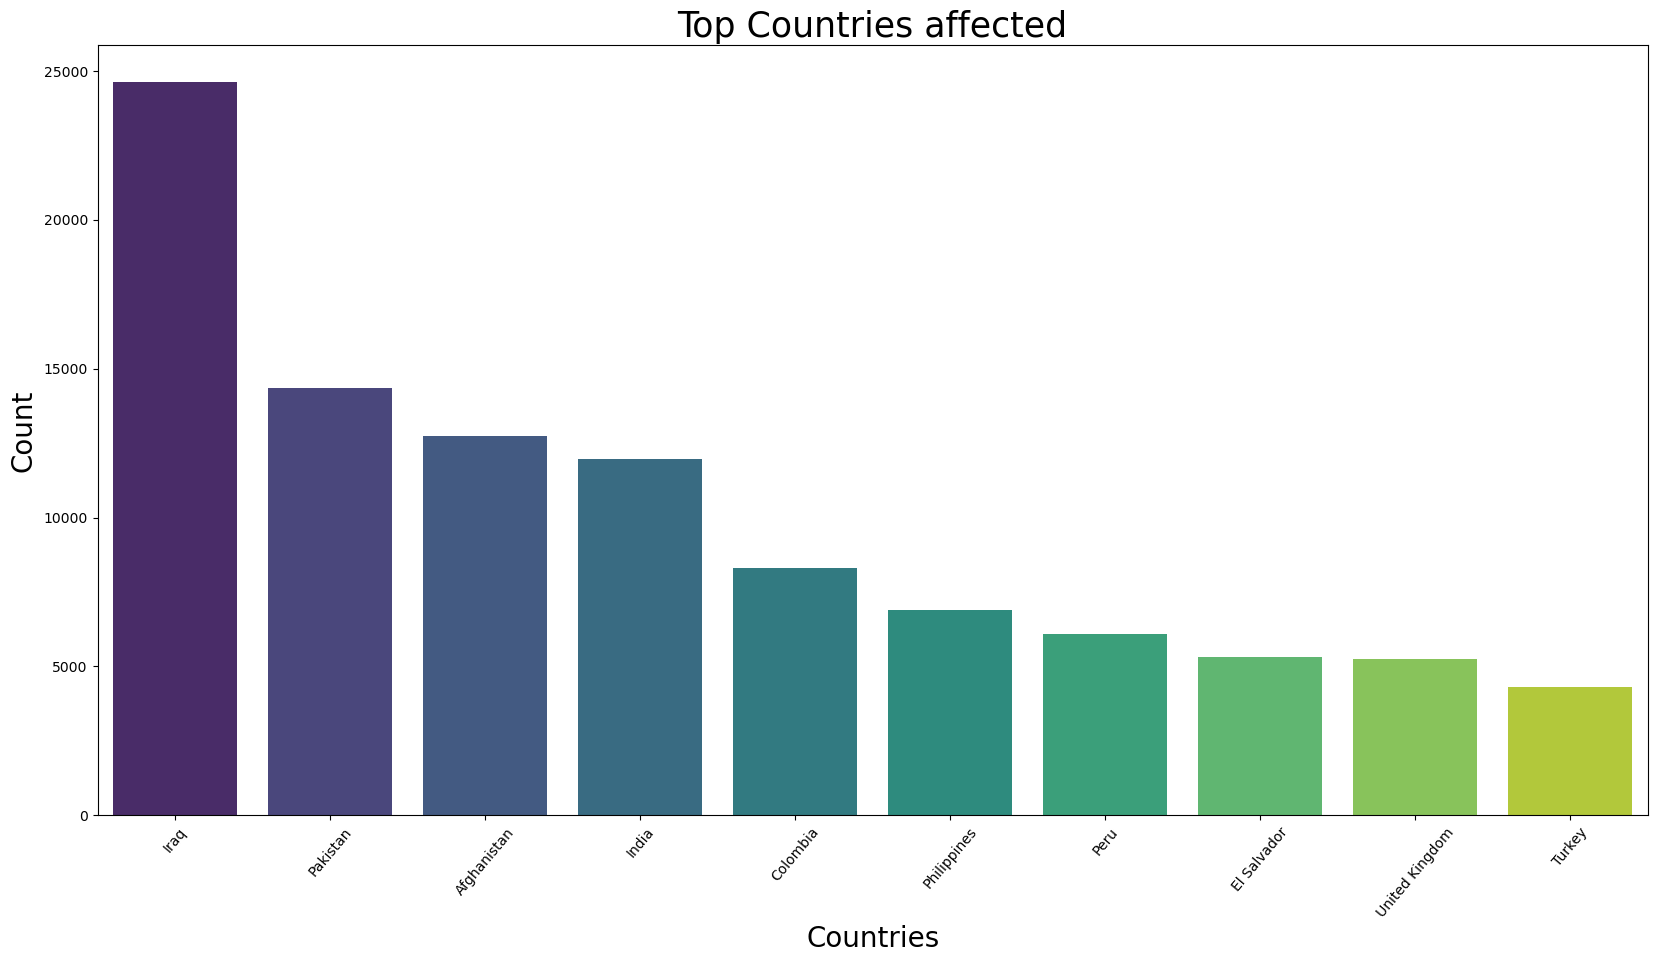

In [162]:
plt.subplots(figsize=(20,10))
sns.barplot(x=attack.index, y=attack.values, palette='viridis')
plt.title('Top Countries affected', fontsize=25)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=50)                   # for tilted names of x axis 
plt.show()

### Plotting the people died due to Attack

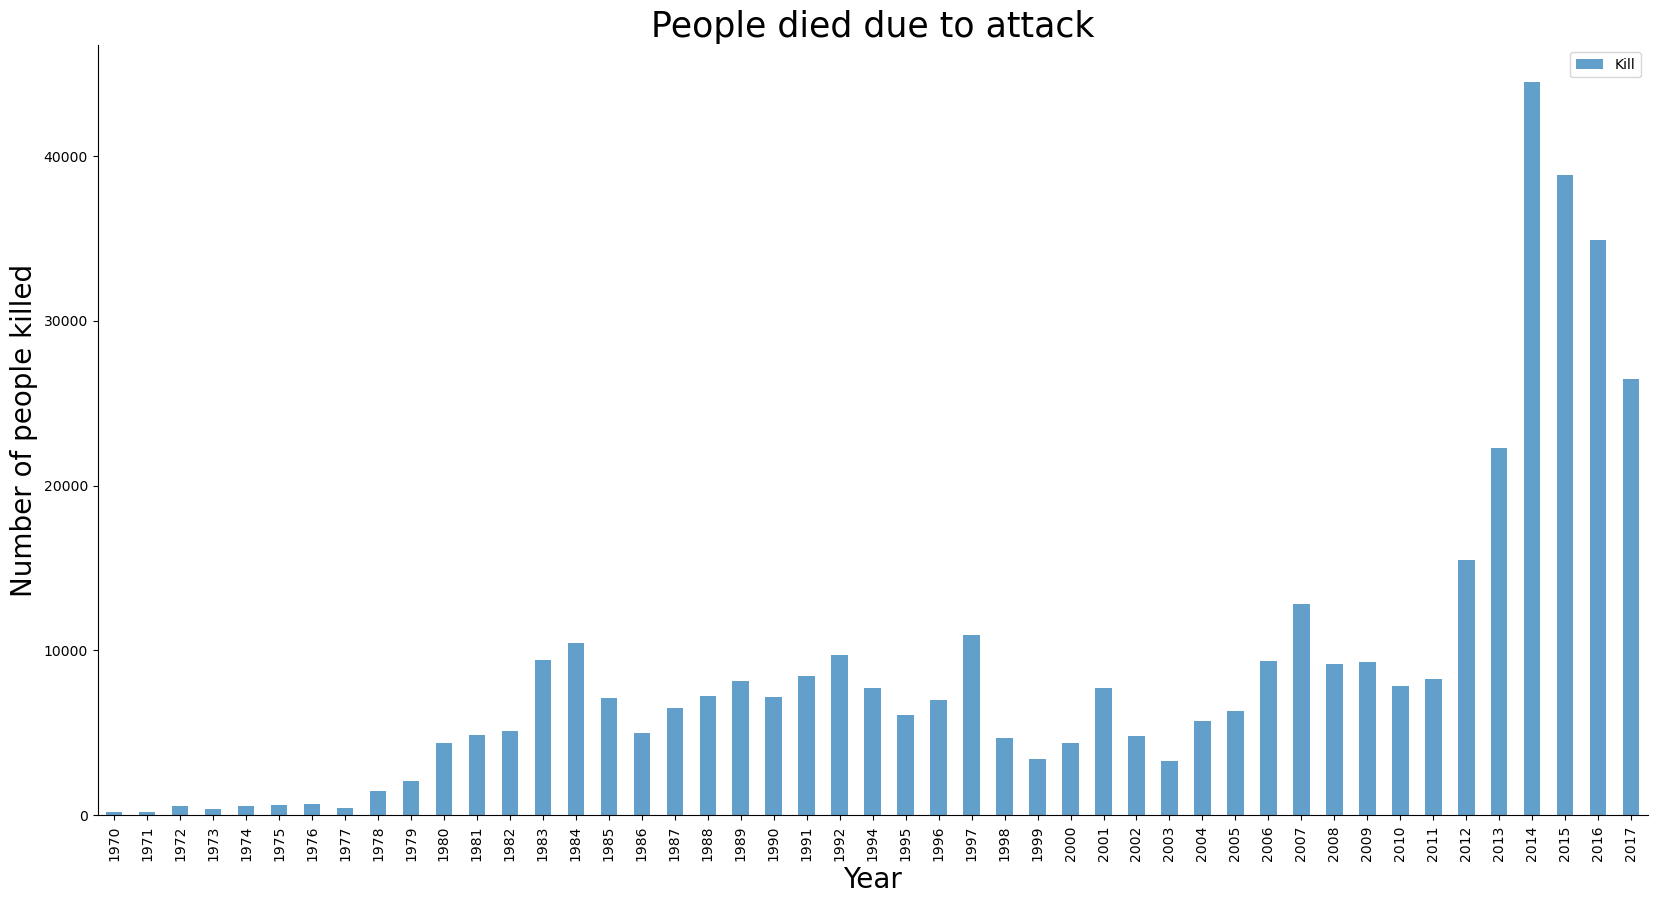

In [37]:
people_died=data[['Year','Kill']].groupby(['Year']).sum()
fig,ax4=plt.subplots(figsize=(20,10))
people_died.plot(kind='bar',alpha=0.7, ax=ax4)
plt.xticks(rotation=90)
plt.title('People died due to attack', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of people killed', fontsize=20)
top_side=ax4.spines['top']
top_side.set_visible(False)
right_side=ax4.spines['right']
right_side.set_visible(False)

### Plotting the top 10 affected city

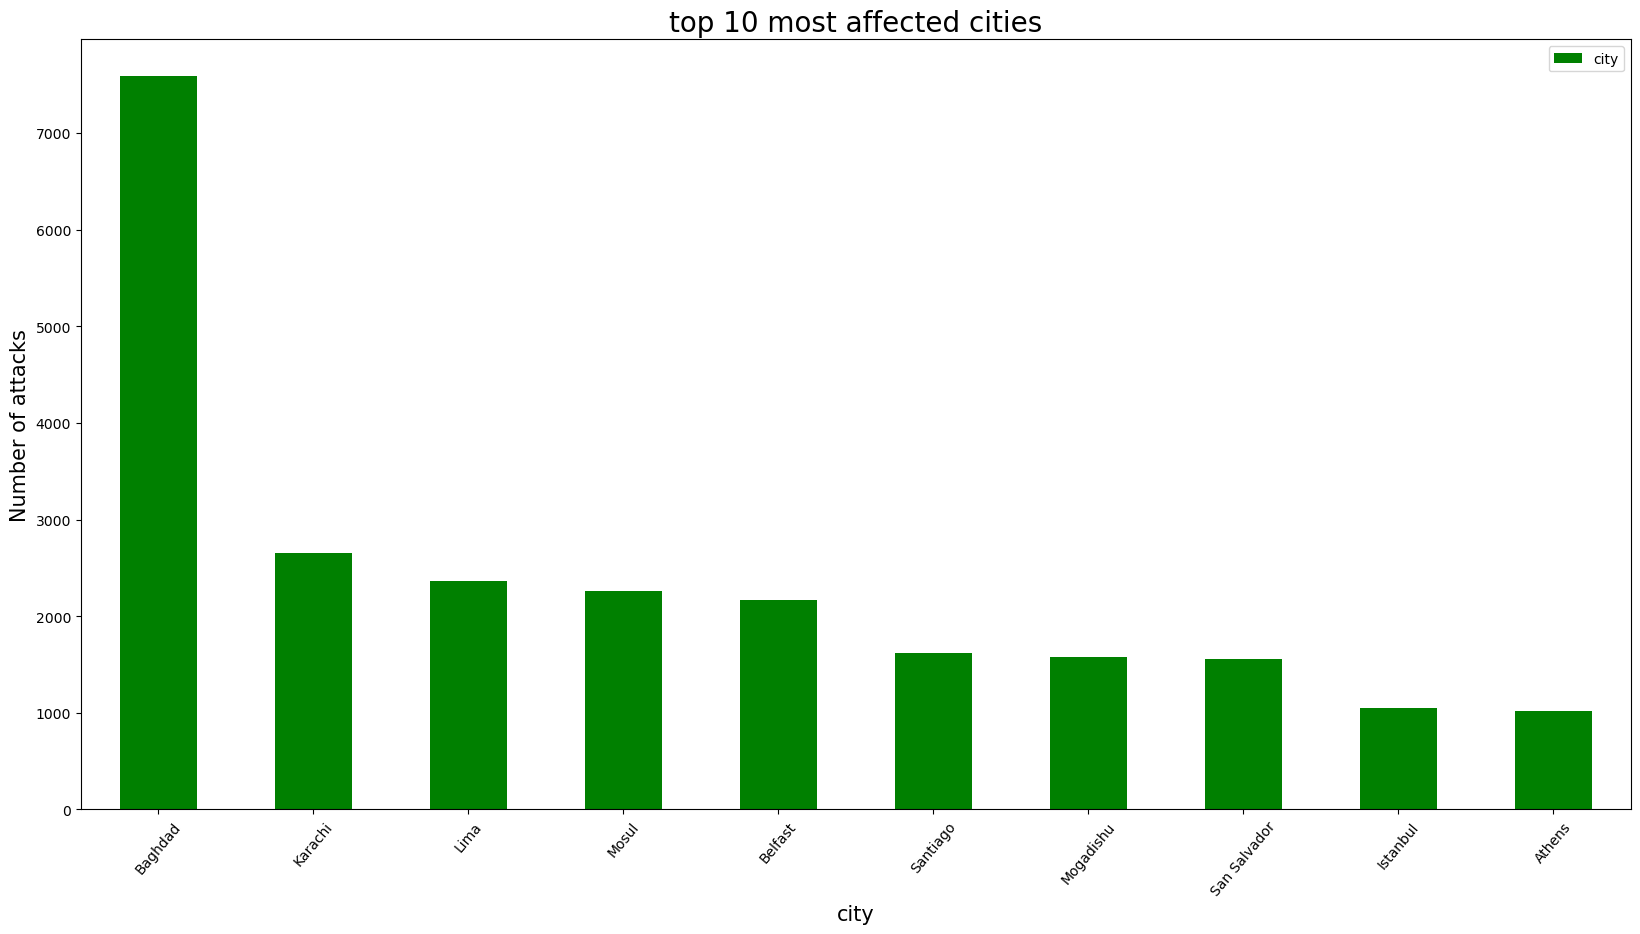

In [157]:
data['city'].value_counts().to_frame().drop('Unknown').sort_values('city', axis=0, ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation=50)
plt.xlabel('city',fontsize=15)
plt.ylabel('Number of attacks',fontsize=15)
plt.title('top 10 most affected cities', fontsize=20)
plt.show()

### Plotting the major attack type

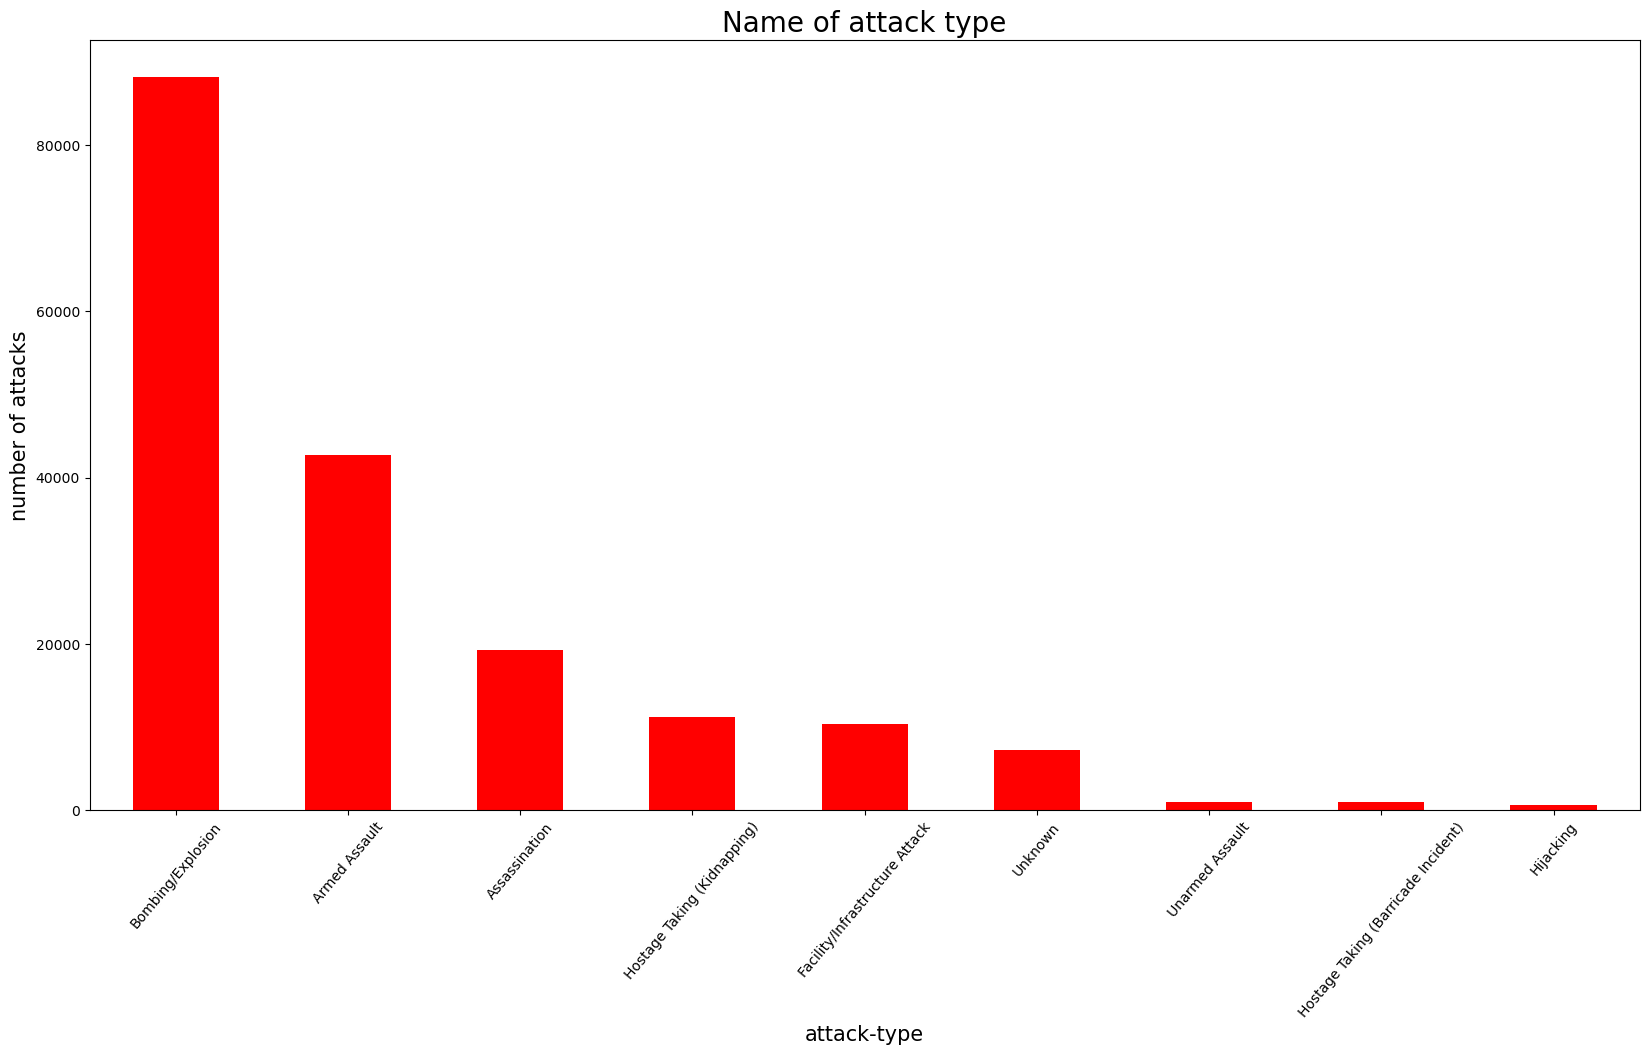

In [42]:
data['Attack_type'].value_counts().plot(kind='bar', figsize=(20,10), color='red')
plt.xticks(rotation=50)
plt.title('Name of attack type', fontsize=20)
plt.xlabel('attack-type',fontsize=15)
plt.ylabel('number of attacks',fontsize=15)
plt.show()

### number of people killed in each attack type

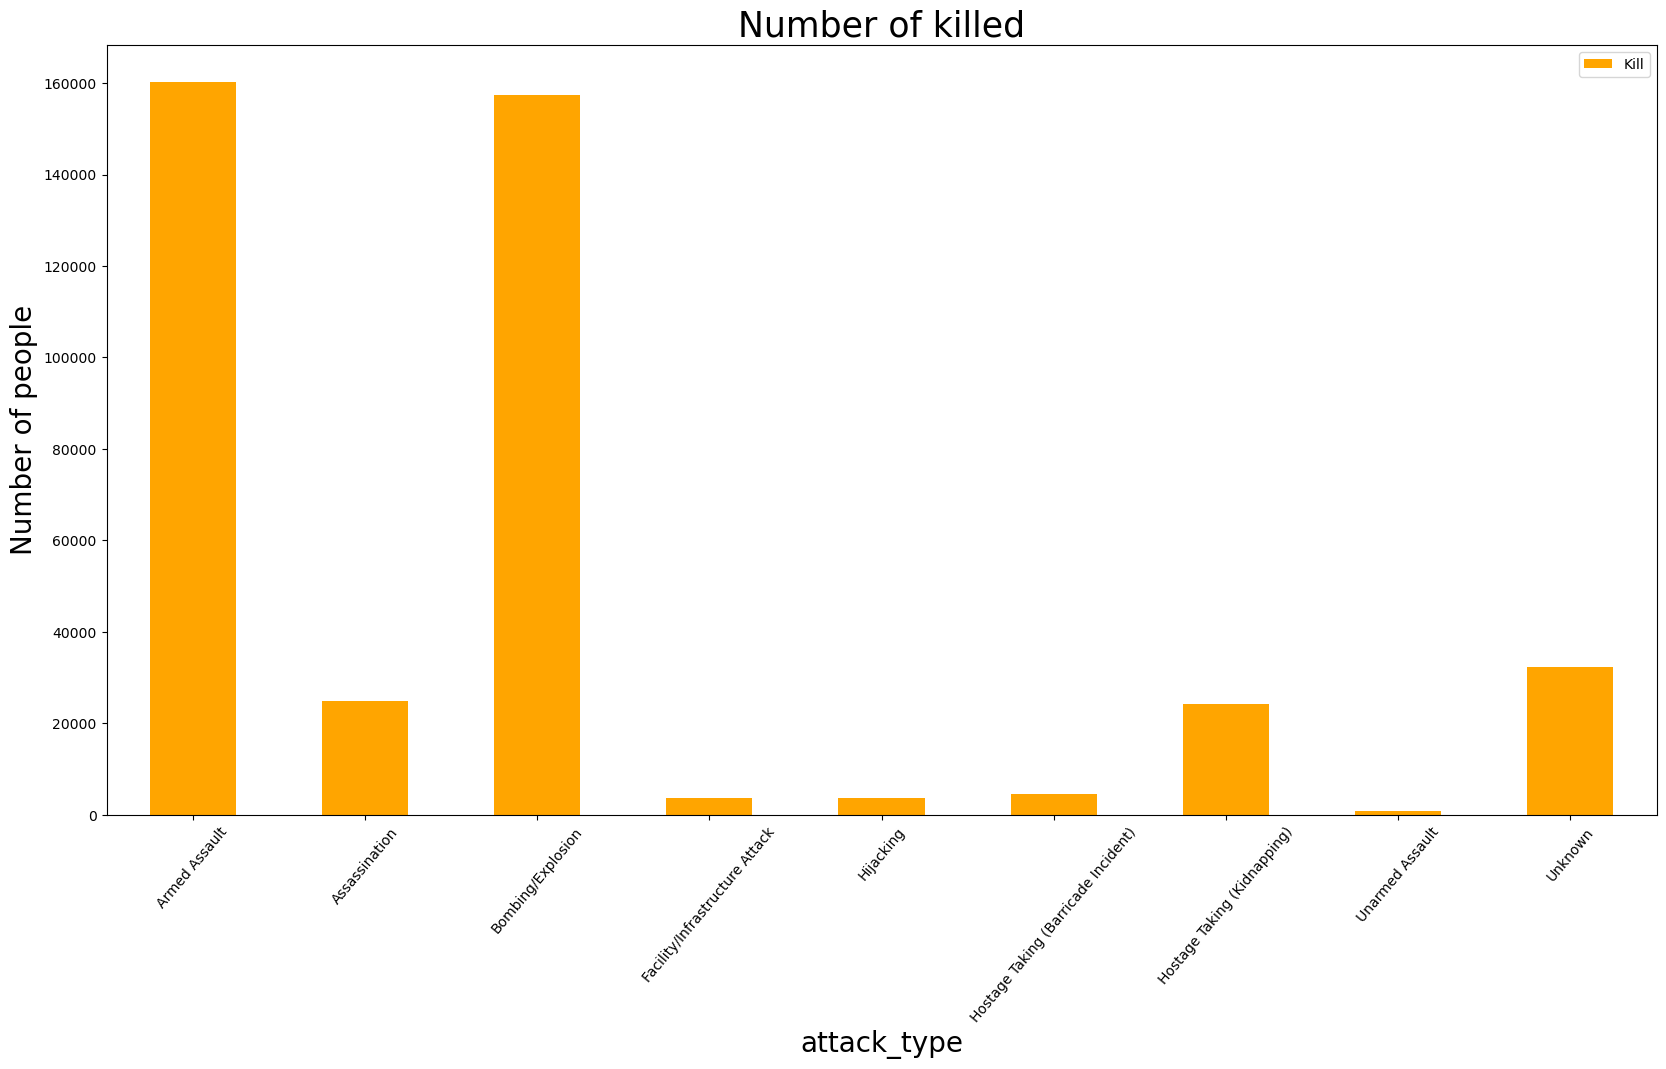

In [43]:
data[['Attack_type','Kill']].groupby(['Attack_type'],axis=0).sum().plot(kind='bar', figsize=(20,10),color='orange')
plt.xticks(rotation=50)
plt.title('Number of killed', fontsize=25)
plt.xlabel('attack_type', fontsize=20)
plt.ylabel('Number of people', fontsize=20)
plt.show()

### Number of people wounded in each attack type

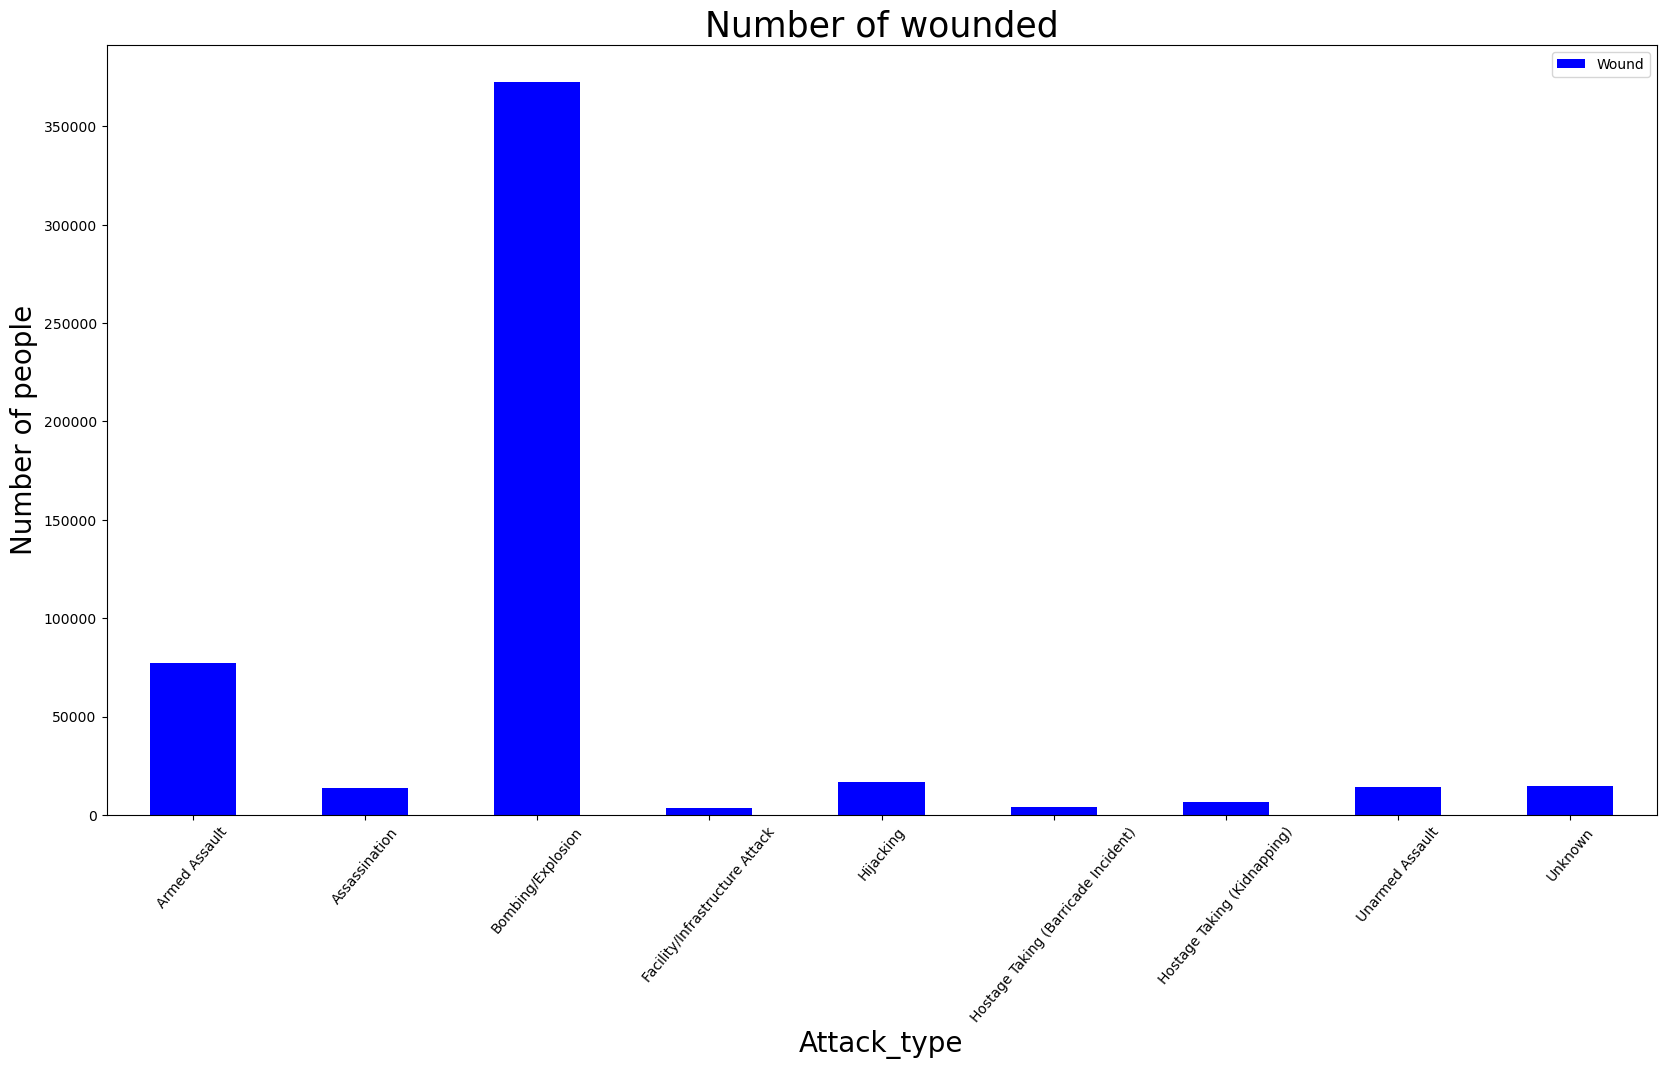

In [47]:
data[['Attack_type','Wound']].groupby(['Attack_type'], axis=0).sum().plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.xlabel('Attack_type', fontsize=20)
plt.ylabel('Number of people', fontsize=20)
plt.title('Number of wounded', fontsize=25)
plt.show()

### Plotting the attack per year

In [68]:
attack_per_year=data[['Target_type','Year']].value_counts().groupby(['Target_type'],axis=0).sum()
attack_per_year

Target_type
Abortion Related                    263
Airports & Aircraft                1343
Business                          20669
Educational Institution            4322
Food or Water Supply                317
Government (Diplomatic)            3573
Government (General)              21283
Journalists & Media                2948
Maritime                            351
Military                          27984
NGO                                 970
Other                               137
Police                            24506
Private Citizens & Property       43511
Religious Figures/Institutions     4440
Telecommunication                  1009
Terrorists/Non-State Militia       3039
Tourists                            440
Transportation                     6799
Unknown                            5898
Utilities                          6023
Violent Political Party            1866
dtype: int64

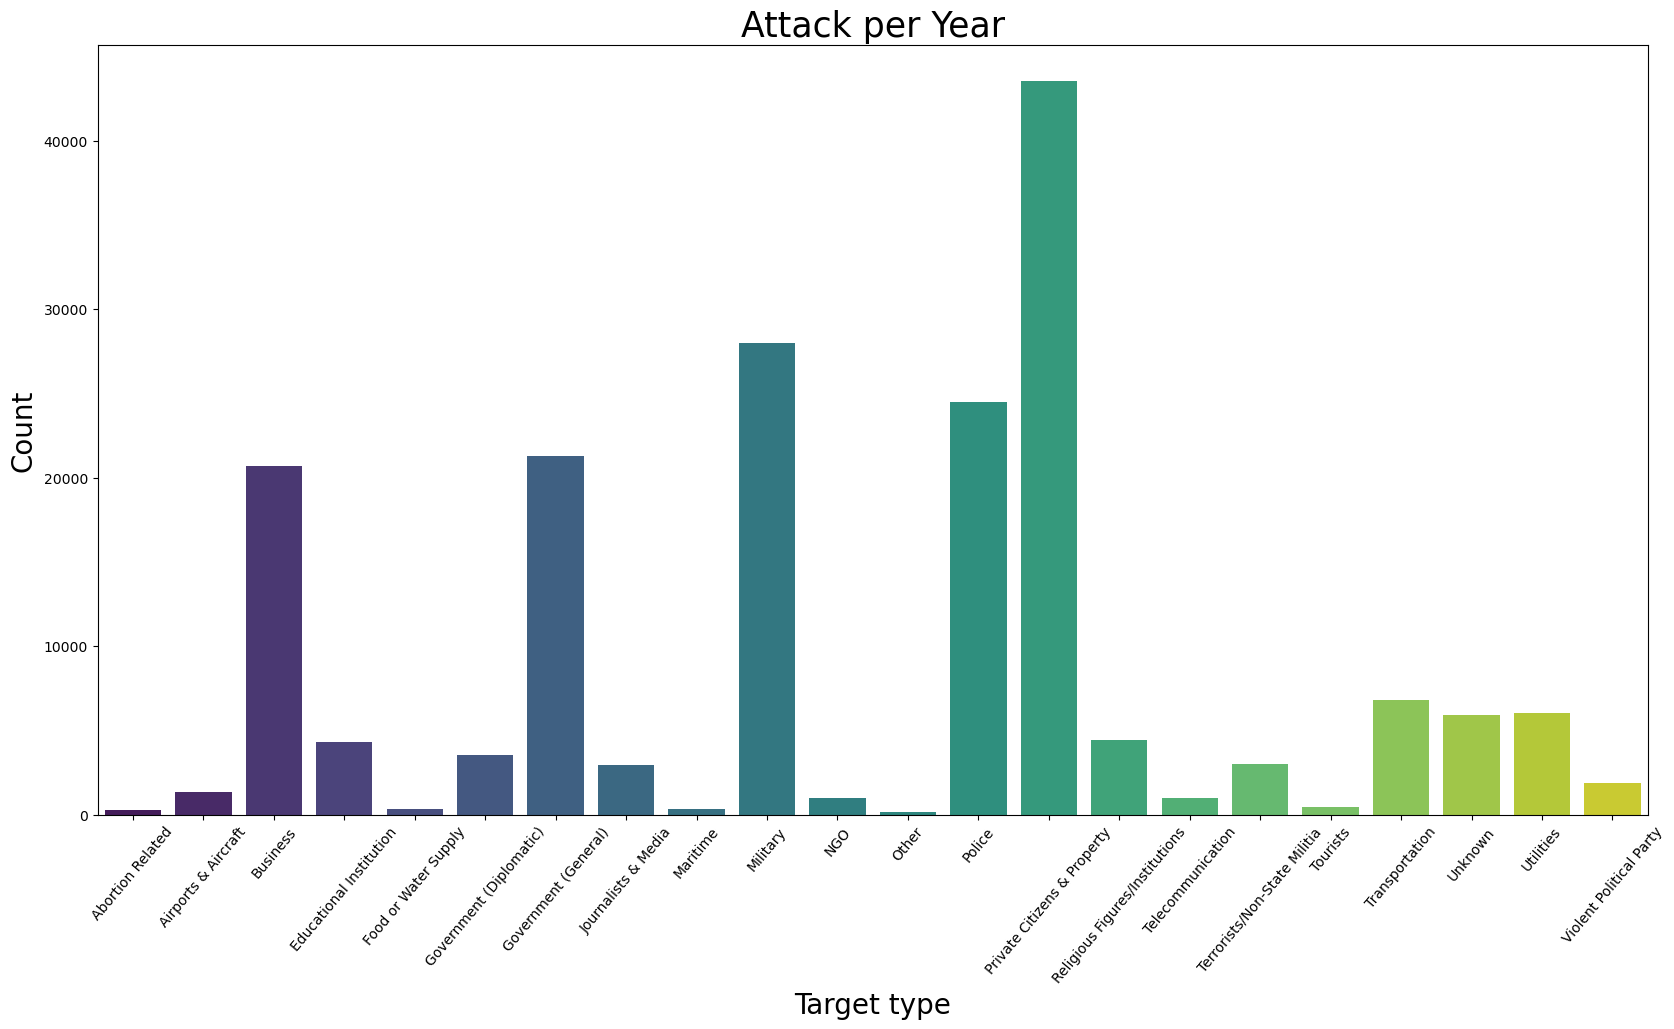

In [70]:
plt.subplots(figsize=(20,10))
sns.barplot(x=attack_per_year.index, y=attack_per_year.values, palette='viridis')
plt.title('Attack per Year', fontsize=25)
plt.xlabel('Target type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=50)
plt.show()

### Plotting the top 10 terrorist group attack

In [96]:
top=data['Group_name'].value_counts().head(10).drop('Unknown')
top

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group_name, dtype: int64

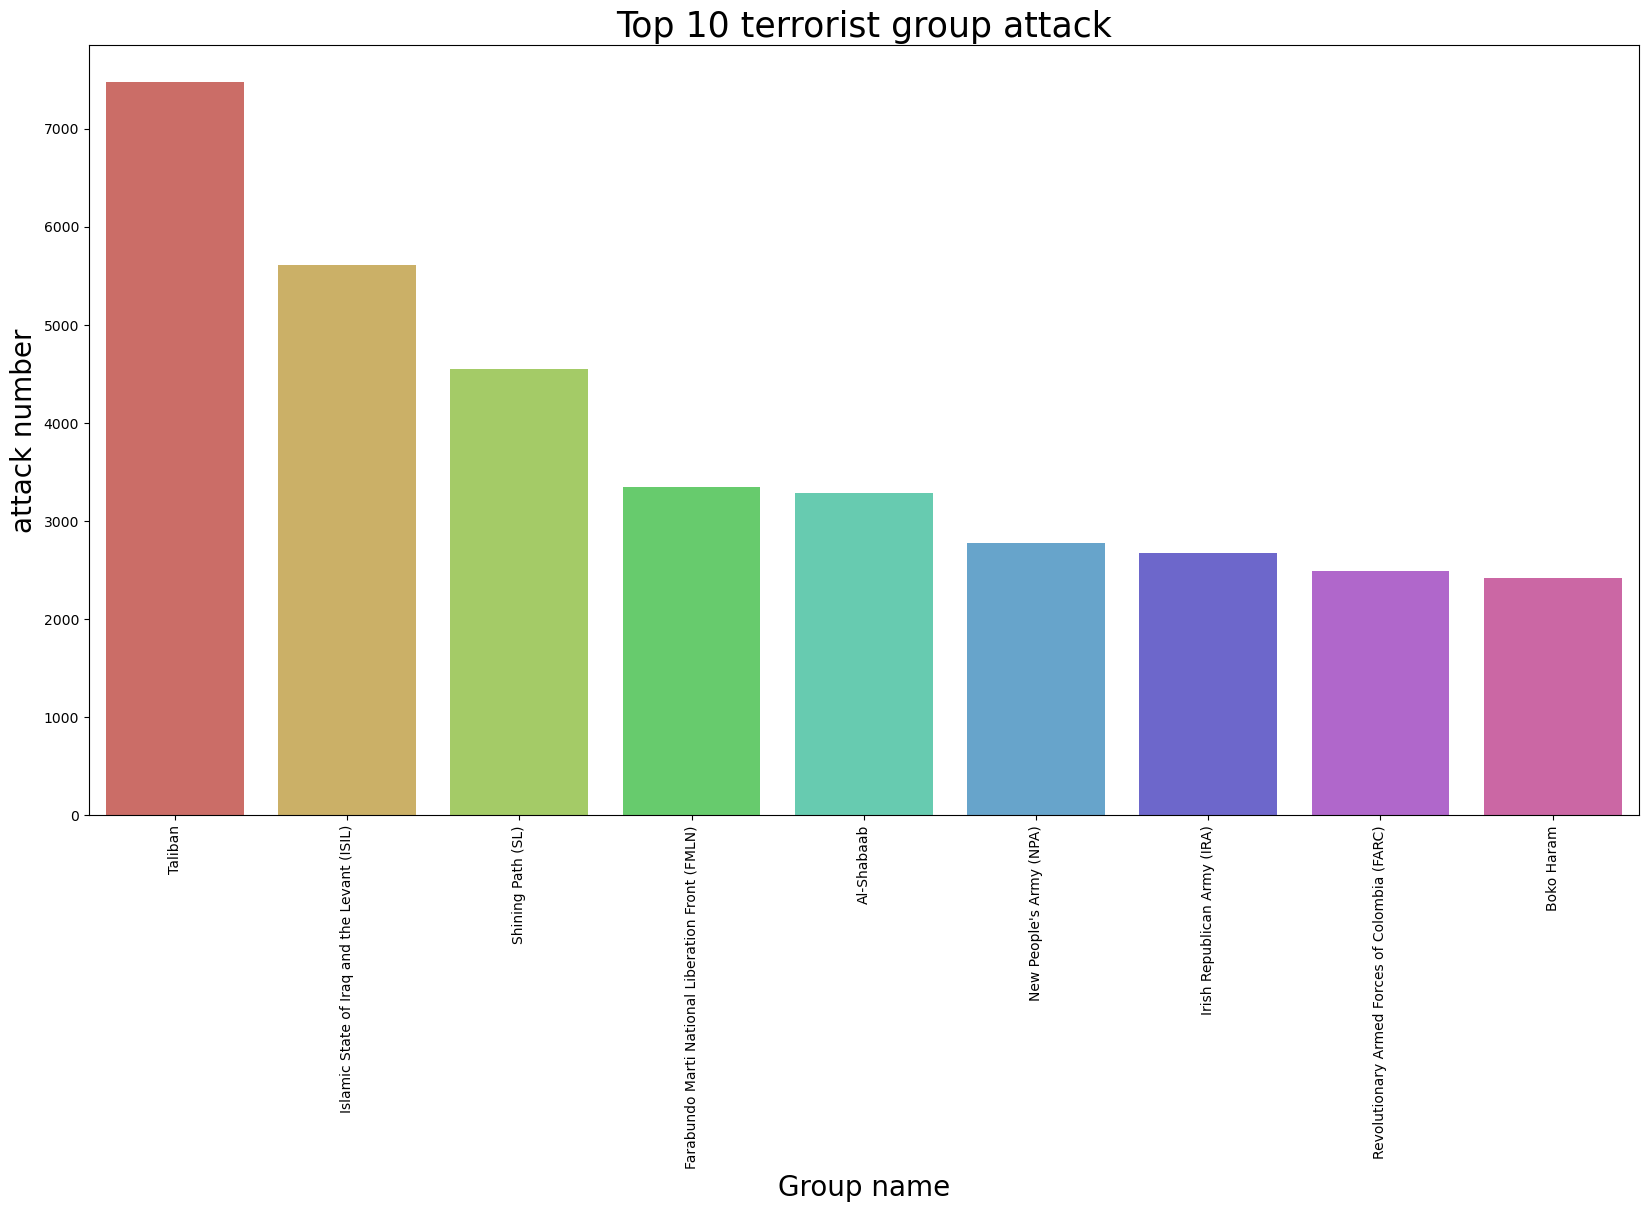

In [101]:
plt.subplots(figsize=(20,10))
sns.barplot(x=top.index, y=top.values, palette='hls')
plt.title('Top 10 terrorist group attack', fontsize=25)
plt.xlabel('Group name', fontsize=20)
plt.ylabel('attack number', fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Top 10 Terrorist Group Attack

In [150]:
df=data[['Group_name','Country_name','Kill']]
df=df.groupby(['Group_name','Country_name'],axis=0).sum().sort_values('Kill', ascending=False).drop('Unknown').reset_index().head(10)
df

Group_name Country_name     Kill
0       Islamic State of Iraq and the Levant (ISIL)         Iraq  31058.0
1                                           Taliban  Afghanistan  29269.0
2                                        Boko Haram      Nigeria  16917.0
3                                 Shining Path (SL)         Peru  11595.0
4           Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka  10928.0
5                                        Al-Shabaab      Somalia   8176.0
6  Farabundo Marti National Liberation Front (FMLN)  El Salvador   8019.0
7       Islamic State of Iraq and the Levant (ISIL)        Syria   6883.0
8                 Nicaraguan Democratic Force (FDN)    Nicaragua   6630.0
9                   Tehrik-i-Taliban Pakistan (TTP)     Pakistan   6014.0

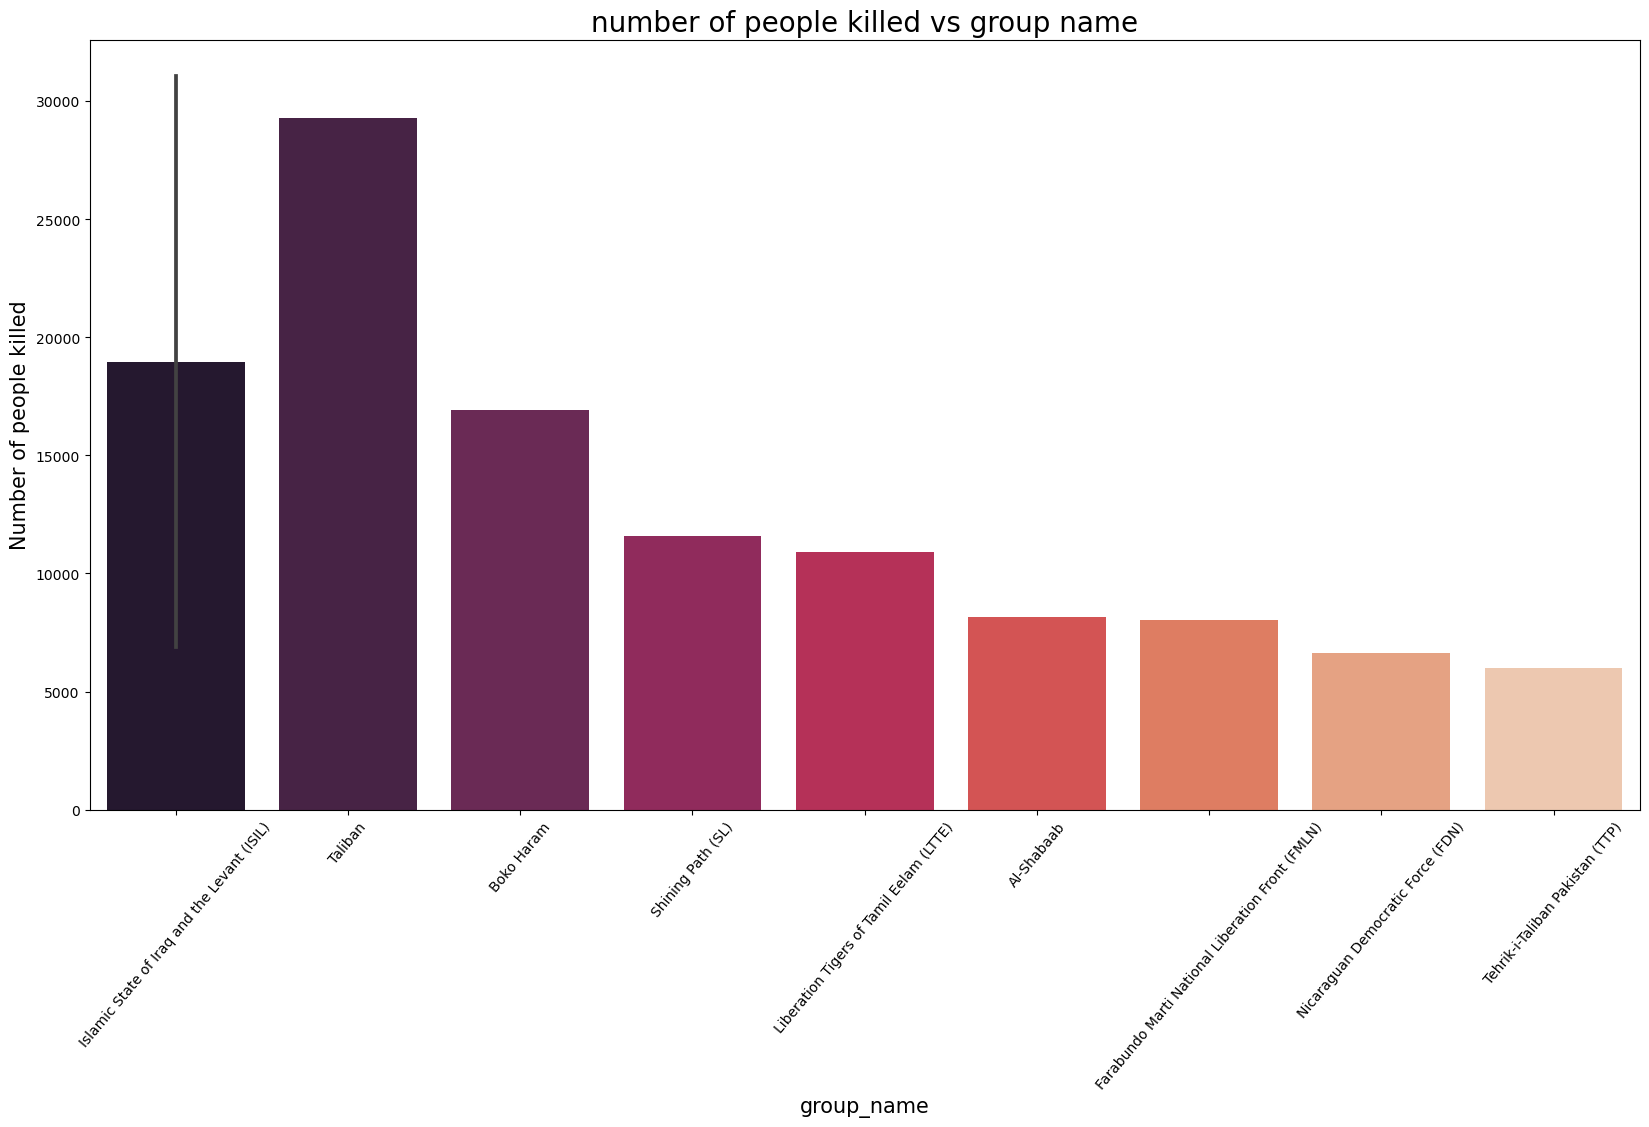

In [151]:
plt.subplots(figsize=(20,10))
sns.barplot(x=df.Group_name, y=df.Kill, palette='rocket')
plt.title('number of people killed vs group name', fontsize=20)
plt.xlabel('group_name', fontsize=15)
plt.ylabel('Number of people killed', fontsize=15)
plt.xticks(rotation=50)
plt.show()

### Total number of people killed by terrorist attack

In [154]:
kill=data.loc[:,'Kill']
print('Number of people killed by terrorist attack :', int(sum(kill.dropna())))

Number of people killed by terrorist attack : 411868


### Pivot table for 'number of people killed' in each 'attack type'

In [155]:
type_kill=data.pivot_table(columns='Attack_type', values='Kill', aggfunc='sum')
type_kill

Attack_type  Armed Assault  Assassination  Bombing/Explosion  \
Kill              160297.0        24920.0           157321.0   

Attack_type  Facility/Infrastructure Attack  Hijacking  \
Kill                                 3642.0     3718.0   

Attack_type  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Kill                                      4478.0                      24231.0   

Attack_type  Unarmed Assault  Unknown  
Kill                   880.0  32381.0

### Pivot table for 'number of people killed' in each 'country

In [156]:
country_kill=data.pivot_table(columns='Country_name', values='Kill', aggfunc='sum')
country_kill

Country_name  Afghanistan  Albania  Algeria  Andorra  Angola  \
Kill              39384.0     42.0  11066.0      0.0  3043.0   

Country_name  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Kill                          0.0      490.0     37.0       23.0     30.0   

Country_name  ...  Vietnam  Wallis and Futuna  West Bank and Gaza Strip  \
Kill          ...      1.0                0.0                    1500.0   

Country_name  West Germany (FRG)  Western Sahara   Yemen  Yugoslavia  Zaire  \
Kill                        97.0             1.0  8776.0       119.0  324.0   

Country_name  Zambia  Zimbabwe  
Kill            70.0     154.0  

[1 rows x 205 columns]

### Conclusion :

- country with most attacks: **Iraq**

- city with most attacks: **Baghdad**

- Region with most attacks: **Middle East & north africa**

- Year with most attacks: **2014**

- Group who had done most attacks: **Taliban**

- Most attack type: **Bombing/Explosion**

- In which attack type max number of people killed: **armed assault and bombing/explosion**

- which group had killed max number of people: **Islamic State of Iraq and the Levant (ISIL)**